In [1]:
import pandas as pd
from gensim.models import Word2Vec, KeyedVectors
import copy
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [347]:
#constantes:
num_clusters = 1620

In [205]:
#pegando o dataframe
df = pd.read_csv('data/laptop_filtered_aspect_sample.csv')
df

,aspect_name
0,laptop
1,use
2,computer
3,screen
4,price
...,...
7330,cool feature
7331,professional laptop
7332,professional life
7333,professional look


In [206]:
words = df.values.tolist()
clean_words = []
clean_vector = []
for word in words:
    clean_words.append(nltk.word_tokenize(word[0]))
for word in words:
    clean_vector.append(word[0].split(" "))

In [207]:
#treinando o modelo de wordvec
model = Word2Vec(sg=0, ns_exponent=0.75,min_count=1, size=32, workers=1,seed=7)
model.build_vocab(clean_words, progress_per=10000)
model.train(clean_words, total_examples=model.corpus_count, epochs=60, report_delay=1)

(663266, 720900)

In [208]:
np_vector = []
np_label = []
for vec in clean_vector:
    count = 0
    string = ''
    aux = []
    exist = False
    for word in vec:
        if word in  model.wv.vocab:
            string += word + ' '
            aux.append(model[word])
            exist = True
    if exist:
        aux = sum(aux)/len(aux)
        np_vector.append(aux)
        np_label.append(string)

C:\Users\Laura\Anaconda3\envs\pnl\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [209]:
#colocando o modelo do TSNE 
from sklearn.manifold import TSNE
SNEt = TSNE(n_components=2, random_state=4)
tsne_data = SNEt.fit_transform(np_vector)


In [210]:
tsne_word = []
for key, tupla in enumerate(tsne_data):
    tsne_word.append(tsne_data[key].tolist())
    tsne_word[key].append(np_label[key])
tsne_word[:5]

[[-28.74469566345215, 34.89983367919922, 'laptop '],
 [-32.28760528564453, 26.964344024658203, 'use '],
 [-28.401765823364258, 35.27787780761719, 'computer '],
 [-35.420650482177734, 42.28151321411133, 'screen '],
 [-29.725069046020508, 37.077232360839844, 'price ']]

In [211]:
sne_pd = pd.DataFrame(tsne_word, columns=['X','Y','Word'])
sne_pd.head()

,X,Y,Word
0,-28.744696,34.899834,laptop
1,-32.287605,26.964344,use
2,-28.401766,35.277878,computer
3,-35.420650,42.281513,screen
4,-29.725069,37.077232,price


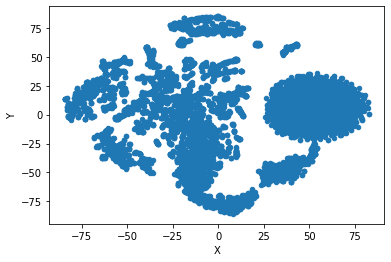

In [212]:
sne_pd.plot.scatter(x='X',y='Y')
plt.show()

In [348]:
#usando k-means
from sklearn.cluster import KMeans
%matplotlib inline

In [349]:
#testando agora com a clusterizacao depois do tsne

In [450]:
#treinando o modelo
clustering = KMeans(n_clusters=num_clusters, random_state=4)
clustering.fit(sne_pd[['X','Y']])
predictClusterKMeans = clustering.predict(sne_pd[['X','Y']])

In [451]:
#achando os centroides
centersKmeans = clustering.cluster_centers_
centersKmeans = pd.DataFrame(centersKmeans,columns=['X','Y'])
centersKmeans.head(5)

,X,Y
0,71.980186,17.234506
1,-51.252585,-29.771487
2,-2.440124,35.242489
3,-3.007103,-25.978721
4,-60.413941,16.661969


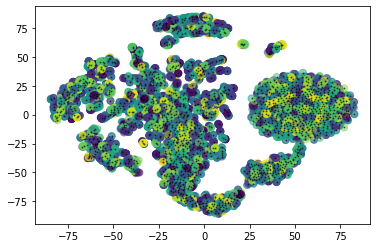

In [452]:
#plotando a resposta
plt.scatter(sne_pd['X'], sne_pd['Y'], c=predictClusterKMeans, s=50, alpha=0.5)
plt.scatter(centersKmeans['X'], centersKmeans['Y'], c='black', s=1, alpha=0.5)
plt.show()


In [453]:
sne_pd['Group'] = predictClusterKMeans
sne_pd = sne_pd.sort_values('Group')
sne_pd.head()

,X,Y,Word,Group
5060,71.701759,17.317890,aspire,0
3467,72.799911,16.975042,goods,0
886,71.622185,17.401699,purchases,0
5906,71.796890,17.243393,sdd,0
2238,-50.887386,-30.064999,big problem,1


In [476]:
sne_pd.loc[sne_pd['Group'] ==10]

,X,Y,Word,Group
5125,43.724323,23.648277,niche,10
3381,43.634872,23.568796,blessing,10
4605,42.713577,23.870737,airport,10


In [477]:
import glob
files_present = True
while(files_present):
    name = input('nome que deseja para o arquivo resposta:')
    filename = name + '.csv'
    files_present = glob.glob(filename)
    if not files_present:
        sne_pd.to_csv(filename, encoding='utf-8', index=False, columns=['Word','Group'])
        files_present = False
    else:
        print('Esse Arquivo Já Existe, Tente novamente') 
        


nome que deseja para o arquivo resposta:answer


0